## Required Code

In [30]:
# Imports
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA

In [6]:
def generate_hyperdimensional_data(num_points, dims):
    return np.random.rand(num_points, dims)

def hypersphere_volume(dim):
    return np.pi ** (dim / 2) / math.gamma(dim / 2 + 1)

def hypercube_volume(dim):
    return 2 ** dim

def plot_curse_of_dimensionality():
    figs, axs = plt.subplots(1, 2, figsize=(10,4), tight_layout=True)
    dim_range = list(range(3,101))
    volume_ratios = []
    dists = []
    for i, d in enumerate(dim_range):
        # Get euclidean distances in d-dimensional space
        fake_data = generate_hyperdimensional_data(1000, d)
        dist = pdist(fake_data)
        dists.append(np.mean(dist))

        # Get ratio of d-dim hypersphere to d-dim hypercube
        # Volume calculations sourced from [1], no longer used
        #sphere_vol = hypersphere_volume(d)
        cube_vol = 1 ** d
        inner_vol = 0.8 ** d
        ratio = inner_vol / cube_vol
        volume_ratios.append(ratio)
    # Plot volume ratios
    axs[0].plot(dim_range, volume_ratios, color='blue', label='Volume Ratio')
    axs[0].set_xlabel('Dimensionality')
    axs[0].set_ylabel('Volume Ratio')
    axs[0].set_title('Volume Ratio of Classification Region to Feature Space')

    # Plot mean distances
    axs[1].plot(dim_range, dists, color='red', label='Mean Distance')
    axs[1].set_xlabel('Dimensionality')
    axs[1].set_ylabel('Mean Euclidean Distance')
    axs[1].set_title('Mean Pairwise Euclidean Distance')

    plt.show()

In [145]:
def draw_lines():
    plt.plot([0, 1], [0, 0], color='b')
    plt.plot([0.1, 0.9], [0, 0], color='r')

    plt.xlim(0, 1)
    plt.ylim(-0.1, 0.1)

    plt.xlabel('X')
    plt.ylabel('Y')

    plt.gca().axes.yaxis.set_visible(False)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

In [146]:
def draw_squares():
    plt.fill([0, 1, 1, 0, 0], [0, 0, 1, 1, 0], color='blue')
    plt.fill([0.1, 0.9, 0.9, 0.1, 0.1], [0.1, 0.1, 0.9, 0.9, 0.1], color='red')

    plt.xlim(0, 1)
    plt.ylim(0, 1)

    plt.xlabel('X')
    plt.ylabel('Y')

    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

In [147]:
def draw_cubes():
    fig = plt.figure(figsize=(6, 6))
    ax = fig.add_subplot(111, projection='3d')

    ax.plot([0, 1, 1, 0, 0], [0, 0, 1, 1, 0], [0, 0, 0, 0, 0], color='b')  # Bottom square
    ax.plot([0, 1, 1, 0, 0], [0, 0, 1, 1, 0], [1, 1, 1, 1, 1], color='b')  # Top square
    ax.plot([0, 0], [0, 0], [0, 1], color='b')  # Vertical lines
    ax.plot([1, 1], [0, 0], [0, 1], color='b')
    ax.plot([1, 1], [1, 1], [0, 1], color='b')
    ax.plot([0, 0], [1, 1], [0, 1], color='b')

    x_inner = np.array([[0.1, 0.9, 0.9, 0.1, 0.1],
                        [0.1, 0.9, 0.9, 0.1, 0.1],
                        [0.1, 0.9, 0.9, 0.1, 0.1],
                        [0.1, 0.9, 0.9, 0.1, 0.1],
                        [0.1, 0.9, 0.9, 0.1, 0.1]])
    y_inner = np.array([[0.1, 0.1, 0.1, 0.1, 0.1],
                        [0.1, 0.1, 0.1, 0.1, 0.1],
                        [0.9, 0.9, 0.9, 0.9, 0.9],
                        [0.9, 0.9, 0.9, 0.9, 0.9],
                        [0.1, 0.1, 0.1, 0.1, 0.1]])
    z_inner = np.array([[0.1, 0.1, 0.1, 0.1, 0.1],
                        [0.1, 0.1, 0.1, 0.1, 0.1],
                        [0.1, 0.1, 0.1, 0.1, 0.1],
                        [0.9, 0.9, 0.9, 0.9, 0.9],
                        [0.9, 0.9, 0.9, 0.9, 0.9]])

    for i in range(4):
        ax.plot_surface(x_inner[i:i+2], y_inner[i:i+2], z_inner[i:i+2], color='r', alpha=0.5)
    ax.plot_surface(np.stack([x_inner[0], x_inner[0], x_inner[-1], x_inner[-1]]),
                    np.stack([y_inner[0], y_inner[0], y_inner[-1], y_inner[-1]]),
                    np.stack([z_inner[0], z_inner[-1], z_inner[-1], z_inner[0]]),
                    color='r', alpha=0.5)

    ax.set_xlim([0, 1])
    ax.set_ylim([0, 1])
    ax.set_zlim([0, 1])
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    plt.show()


# Mathematics Behind Principal Component Analysis

By Matthew O'Malley-Nichols 

MTH 341

## Introduction To Dimensionality Reduction

### Motivation for Dimensionality Reduction 
In many machine learning scenarios, training samples may contain hundreds to millions of features which represent characteristics of the data. As the number of features increase, training time can increase linearly or even exponentially. Additionally, large amounts of features can prevent machine learning algorithms from finding optimal solutions due to the curse of dimensionality. 



### The Curse of Dimensionality


Consider a hypothetical single feature with uniformly distributed values between 0 and 1, where values ranging between 0.1 and 0.9 indicate a specific sample classification.

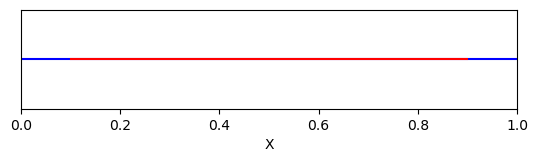

In [148]:
draw_lines()

If we wanted to find the probability of a sample having values between 0.1 and 0.9, we would divide the volume of the desired region by the volume of the entire space.$^{[1]}$
<p style="text-align: center;"><span style="font-size: 18px;"><strong>Probability of Red Region</strong></span>
<br>
$ Probability = Region_{vol} / Space_{vol}$
<br>
$=x^{d}$
<br>
<em>Where:</em>
<br>
<em>x =  $space_{length} - \neg region_{length} $ $^{[1]}$</em>
<br>
<em>d = number of features</em>
</p>
<br>
$ Probability: (0.9 - 0.1)^1 = 0.8^1 = 0.8 $

In this case, the sample has an $80$% probability of being a red sample.

Now, consider we have two features each with the previous distribution.

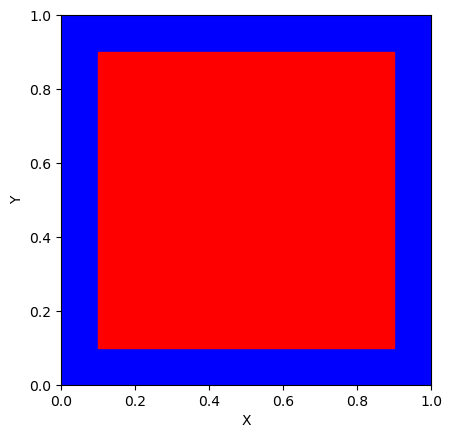

In [149]:
draw_squares()

$ Probability: 0.8^2 = 0.64$

Despite the value ranges being the same in one and two dimensions, the probability of the sample being red decreased from $80$% to $64$%.

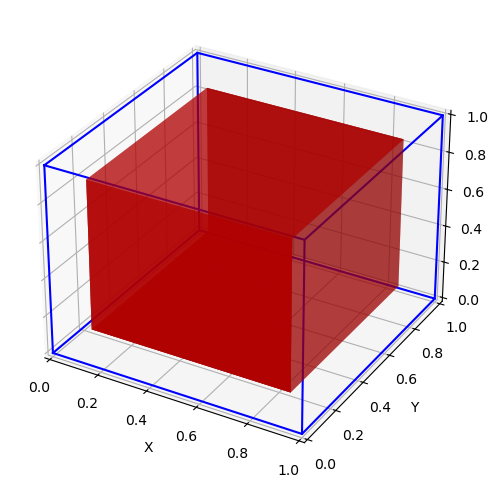

In [150]:
draw_cubes()

In three dimensions, the probability decreases once again to $51.1$%.

This trend of the middle region shrinking continues in n-dimensions.$^{[1]}$

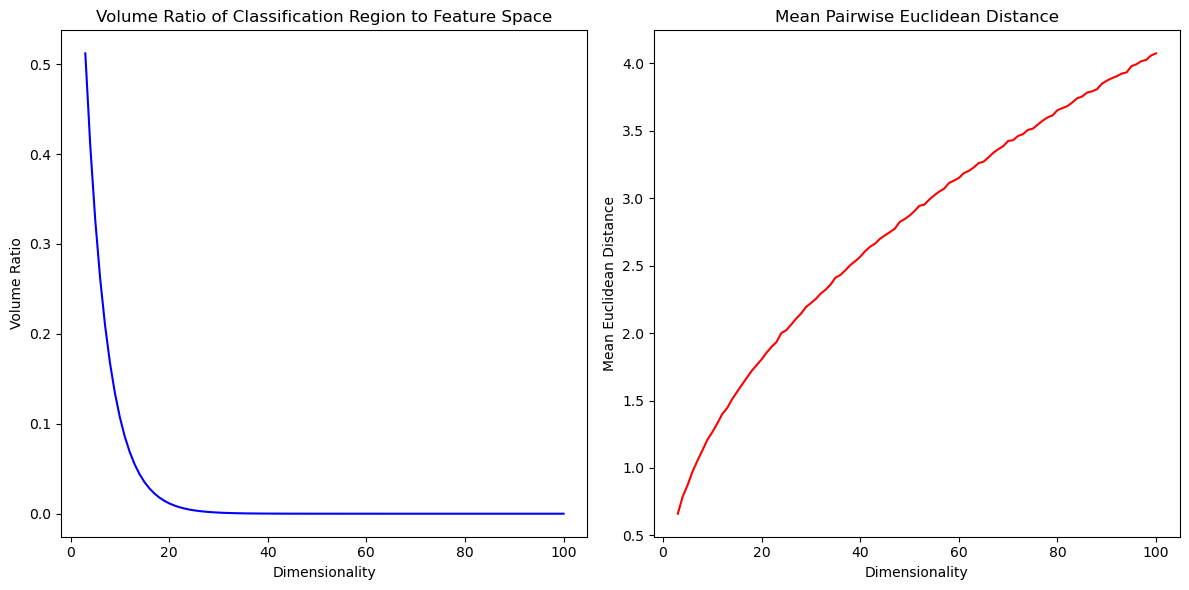

In [4]:
plot_curse_of_dimensionality()

<p style="text-align: center;">$d(\mathbf{p}, \mathbf{q}) = \sqrt{\sum_{i=1}^{n} (q_i - p_i)^2}$
<br>
<em>Pairwise Euclidean Distance in N-Dimensional Space $^{[3]}$</em>
</p>
<br>
With each additional feature added, the classification space contracts relative to the feature space. Consequently, the distribution of the data within the classification space becomes sparser, inflating the distances between points.$^{[1]}$ Since the samples are further apart, many machine learning algorithms will struggle to classify samples. 

To address these issues, the dimensionality of data should be reduced while preserving the differences between samples. One algorithm that does such is Principal Component Analysis.

## Principal Component Analysis

Principal Component Analysis (PCA) is a technique to extract simplified features from complex datasets. PCA reduces the dimensionality of data while maintaining a specified explained variance of the data. This can be used to help data visualization, reduce the dimensionality of the data, or extract relevant features from a dataset. 

PCA can uncover hidden patterns in datasets with large numbers of features, making it more computationally realistic to perform machine learning algorithms on a high dimensional dataset. In many cases, PCA can be a useful process in the feature engineering step of a dataset.

There are two main methods to calculate PCA. One involves eigendecomposing the covariance matrix, and the other factors a matrix using singular value decomposition in order to get a matrix containing the principle components. Both methods require the data to first be centered along the origin in order to find the directions of maximal variance in the data.

### Calculating PCA


#### <p style="text-align: center;"><span style="font-size: 18px;"><strong>PCA by Eigendecomposition$^{[2]}$</strong></span>
\begin{align*}
    1. &\quad \bar X = X - \mu \\
    2. &\quad \Sigma = \frac{1}{m} \bar{X}^T \bar{X} \\
    3. &\quad \Sigma V = V \lambda \\
    4. &\quad W_k = \{ V_1 , \ldots, V_k \} \\
    5. &\quad Y = \bar{X} W_k
\end{align*}


PCA by eigendecomposition begins by centering the data around the origin to get $\bar X$. The covariance matrix $\Sigma$ is found by dot producting the centered matrix with its transpose and dividing it by the number of samples. This covariance matrix has diagonal elements corresponding to explained variances, and non-diagonal elements corresponding to covariances. The eigendecomposition of this matrix gives us eigenvectors referring to principal components of variance and eigenvalues referring to explained variances. We build a weight matrix $W$ using $k$ sorted principal components and project this onto the centered matrix to give us the newly transformed data $Y$. Lastly, we add the mean of the dataset back in order to reconstruct it.

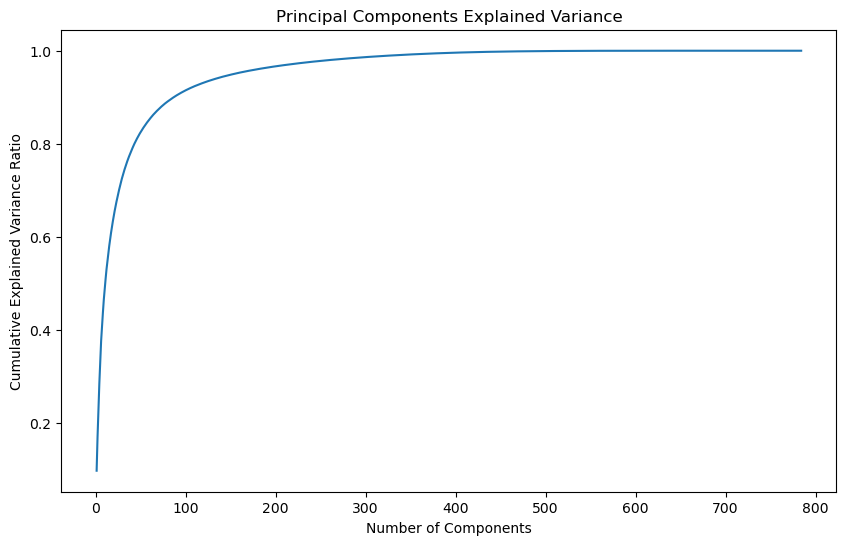

In [29]:
mnist = fetch_openml('mnist_784')
X = np.array(mnist.data.astype('float64'))
num_features = X.shape[1]
y = mnist.target
mu = np.mean(X, axis=0)

# Center data
X_bar = X - mu

# Compute covariance matrix
cov_matrix = np.cov(X_bar, rowvar=False)

# Perform eigendecomposition
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

# Sort eigenvalues and eigenvectors by explained variance
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

# Calculate explained variance ratio for each PC
# by taking the ratio of explained variance to the total of the eigenvalues
cumulative_variance_ratio = np.cumsum(sorted_eigenvalues) / np.sum(sorted_eigenvalues)

plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, num_features + 1), cumulative_variance_ratio, linestyle='-')
plt.title('Principal Components vs Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.show()

In this example, the MNIST dataset has samples that are $ 28*28$ pixels and thus have $784$ features. When we take the cumulative sum of $k$ eigenvalues and divide them by the sum of all eigenvalues, we find how much variance these $k$ eigenvalues explain. This allows us to automatically choose a number of principle components that explain a specified percentage of the variance. We can also investigate the second derivative of the function of number of components to explained variance. This allows us to identify an inflection point (knee) where adding more components leads to diminishing returns.

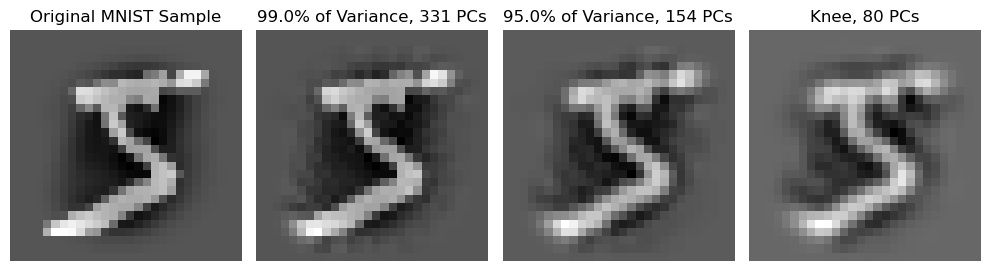

In [50]:
figs, axs = plt.subplots(1, 4, figsize=(10,4), tight_layout=True)

variance_ratios = [.99, .95]
reconstructed_samples = []
axs[0].imshow(X_bar[0].reshape(28, 28), cmap='gray')
axs[0].set_title('Original MNIST Sample')
axs[0].axis('off')


for i, var in enumerate(variance_ratios): 
    num_components = np.argmax(cumulative_variance_ratio >= var) + 1
    top_eigenvectors = sorted_eigenvectors[:, :num_components]
    projected_data = np.dot(X_bar, top_eigenvectors)
    reconstructed_sample = np.dot(projected_data[0], top_eigenvectors.T).reshape(28, 28)
    axs[i + 1].imshow(reconstructed_sample, cmap='gray')
    axs[i + 1].set_title(f"{var * 100}% of Variance, {num_components} PCs")
    axs[i + 1].axis("off")

num_components = 80
top_eigenvectors = sorted_eigenvectors[:, :num_components]
projected_data = np.dot(X_bar, top_eigenvectors)
reconstructed_sample = np.dot(projected_data[0], top_eigenvectors.T).reshape(28, 28)

axs[-1].imshow(reconstructed_sample, cmap='gray')
axs[-1].set_title(f"Knee, {num_components} PCs")
axs[-1].axis('off')

plt.show()

With the MNIST dataset containg samples with 784 features, reducing the dimensionality by PCA maintains the visual integrity of the data. Selecting less principal componts leads to more noise within the data, but patterns can still be identified. The number of principal components kept depends on the machine learning algorithm used. Machine learning algorithms have varying tolerance to noise and varying computational complexity due to feature size. This forces practitioners to find a compromise between noise and performance. In the context of MNIST, selecting principal components comprising 95% of the variance would provide a suitable starting point for feature engineering.

#### <p style="text-align: center;"><span style="font-size: 18px;"><strong>PCA by Singular Value Decomposition$^{[2]}$</span></strong></p>
\begin{align*}
    1. &\quad X = U \Sigma W^T \\
    2. &\quad Y = XW_k \\
\end{align*}

In addition to eigendecomposition, principal components can also be found by finding the singular value decomposition of the matrix. This involves building a weight matrix with the first $k$ singular vectors in the $U$ matrix and their corresponding singular values in $\Sigma$. Then, this weight matrix is projected onto the initial data to find the transformed matrix $Y$.

## Conclusion

In short, Principal Component Analysis is a powerful tool for dimensionality reduction. PCA provides a method to extract features from datasets while simultaneously reducing the computational cost. The eigendecomposition method of PCA provides an intuitive approach to deconstructing data into lower dimensions. On the other hand, recent advances in computing singular value decomposition have made it more computationally efficient than eigendecomposition.$^{[4]}$ Either way, PCA remains an important methhod for reducing data dimensionality through the application of linear algebra techniques.


### Relevance to Interests

As a Computer Science student, the mathematics behind Principal Component Analysis holds relevance to my personal interests. Linear algebra provides a foundation to analyzing data structures, and finding patterns within complex datasets. Exploring the applications of linear algebra in PCA enhances my intuition for detecting patterns in data. The study of algorithms continues to be an integral component of my academic journey.

## References

1. Salih, Salih. “The Surprising Behavior of Data in Higher Dimensions.” Medium, Towards Data Science, 15 Dec. 2023
2. “Principal Component Analysis.” Wikipedia, Wikimedia Foundation, 19 Feb. 2024
3. Tu. “Optimising Pairwise Euclidean Distance Calculations Using Python.” Medium, Towards Data Science, 11 Jan. 2021
4. Boyd, Stephen, and Lieven Vandenberghe. Convex Optimization, 8 Mar. 2004,